# Data Wrangling project
# What influences wine quality ?
January 2024 

By Māra and Ovi 

In [201]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

### Data acquisition

In [202]:
# Loading the dataset
data = pd.read_csv('WineQT.csv')

In [203]:
# Looking at the initial data 
data.head
# The Id coulumn has an iteresting end. 

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075  

In [204]:
data.info()
# Only quality and Id are integers the rest are objects.
# However the Id strangely reaches 1597 in the 1142 row. 
# There are no null values :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [205]:
data.describe().T
# Apart from the Id's range being higher than the amount of entries,
    # the .... are the most interesting 

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


### Data Cleaning 

In [206]:
# Changing the data types of the columns to investigatable types
data = data.astype({'quality': float, 'Id': float})

In [207]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [208]:
# Checking for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [209]:
# Checking unique values in Id column
unique_id = data['Id'].nunique()
print(f"Number of unique id: {unique_id}")

Number of unique id: 1143


In [210]:
# Dropping the 'Id' column - due to irrelevance and irregularities
data = data.drop(columns='Id')

In [211]:
# Standard scale free sulfur dioxide and total sulfur dioxide
scaler = StandardScaler()
data[['free sulfur dioxide', 'total sulfur dioxide']] = scaler.fit_transform(data[['free sulfur dioxide', 'total sulfur dioxide']])

In [212]:
# Renaming columns
new_column_names = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
    'ph', 'sulphates', 'alcohol', 'quality'
]

data.columns = new_column_names

Dealing with outliers 

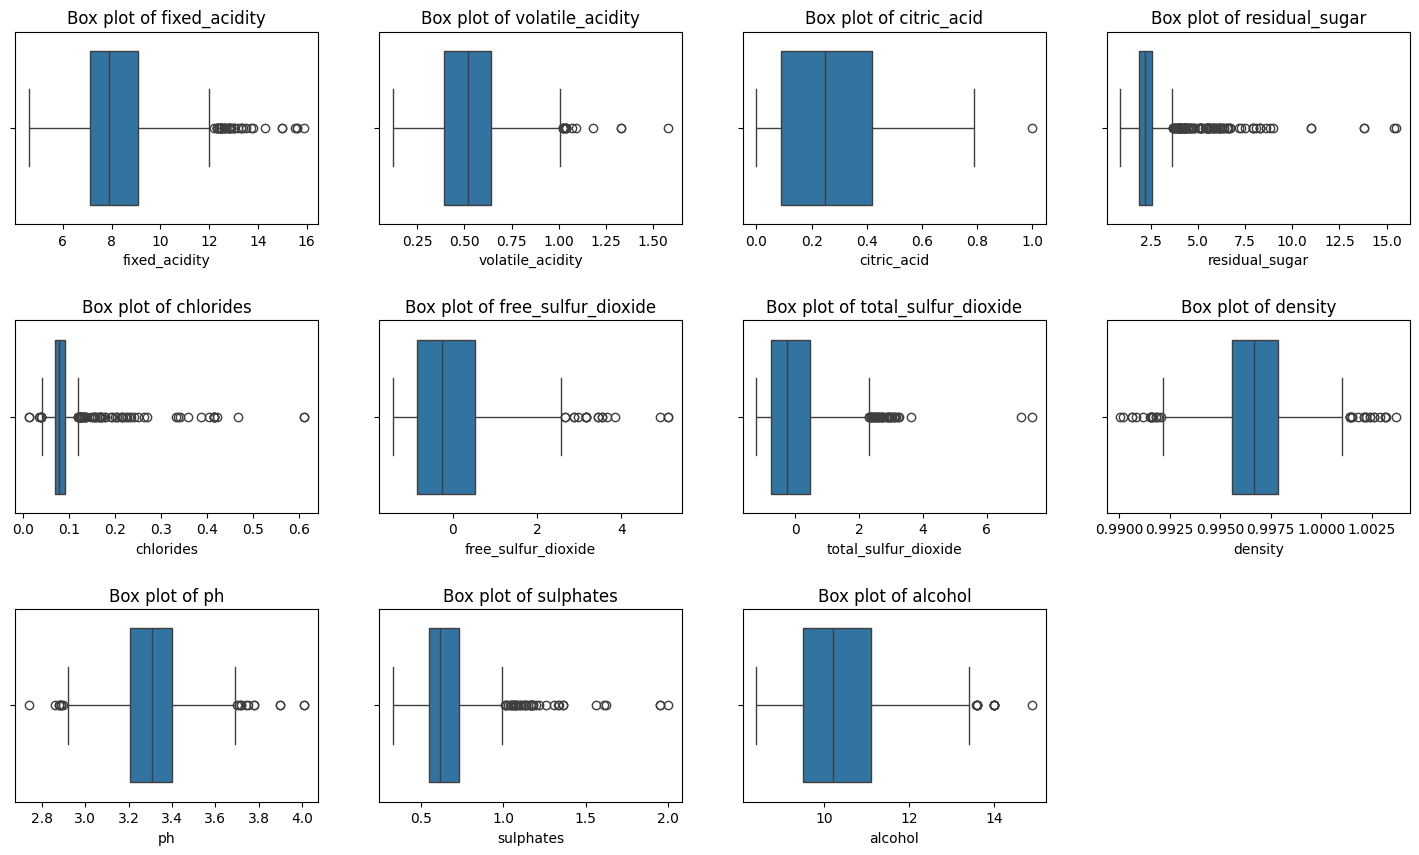

In [213]:
# Creating box plots for each feature to inspect outliers

plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)

for i, column in enumerate(data.columns[:-1], 1):  
    # excluding 'quality' column
    plt.subplot(3, 4, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
plt.show()

In [214]:
# Handling Outliers by capping at the 5th and 95th percentiles
print("Before capping:")
print(data.describe().T)

for column in data.columns[:-1]:  # excluding 'quality' column
    lower_percentile, upper_percentile = data[column].quantile([0.05, 0.95]).values
    data[column] = np.clip(data[column], lower_percentile, upper_percentile)

print("\nAfter capping:")
print(data.describe().T)


Before capping:
                       count          mean       std       min       25%  \
fixed_acidity         1143.0  8.311111e+00  1.747595  4.600000  7.100000   
volatile_acidity      1143.0  5.313386e-01  0.179633  0.120000  0.392500   
citric_acid           1143.0  2.683640e-01  0.196686  0.000000  0.090000   
residual_sugar        1143.0  2.532152e+00  1.355917  0.900000  1.900000   
chlorides             1143.0  8.693263e-02  0.047267  0.012000  0.070000   
free_sulfur_dioxide   1143.0 -5.594825e-17  1.000438 -1.426458 -0.840863   
total_sulfur_dioxide  1143.0  9.946355e-17  1.000438 -1.218108 -0.760341   
density               1143.0  9.967304e-01  0.001925  0.990070  0.995570   
ph                    1143.0  3.311015e+00  0.156664  2.740000  3.205000   
sulphates             1143.0  6.577078e-01  0.170399  0.330000  0.550000   
alcohol               1143.0  1.044211e+01  1.082196  8.400000  9.500000   
quality               1143.0  5.657043e+00  0.805824  3.000000  5.000000

Computing dummy variables 

In [215]:
# Creating a new feature 'free_sulfur_dioxide_ratio'
data['free_sulfur_dioxide_ratio'] = data['free_sulfur_dioxide'] / data['total_sulfur_dioxide']

### Data Aggregation 





In [216]:
# Aggregating data by 'quality' and computing the mean for each feature
print("\nData aggregated by wine quality:")
quality_summary = data.groupby('quality').mean()

quality_summary


Data aggregated by wine quality:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,free_sulfur_dioxide_ratio
quality,,,,,,,,,,,,
3.0,8.450000,0.745000,0.204833,2.582500,0.090167,-0.710731,-0.638270,0.997548,3.361667,0.561667,9.858333,-1.299330
4.0,7.884848,0.661364,0.154212,2.542121,0.079697,-0.092604,-0.155534,0.996638,3.381212,0.601818,10.254545,4.141131
5.0,8.133333,0.578039,0.238501,2.431522,0.084652,0.051471,0.236162,0.997026,3.303582,0.603934,9.901242,3.161743
6.0,8.300866,0.505561,0.261623,2.371504,0.080543,-0.060705,-0.189487,0.996635,3.321472,0.666710,10.634560,4.587768
7.0,8.790210,0.399615,0.376993,2.651224,0.074832,-0.130369,-0.323702,0.996137,3.288531,0.735315,11.415734,0.781879
8.0,8.862500,0.410062,0.423000,2.580625,0.070750,-0.480967,-0.504755,0.995825,3.248750,0.755625,11.700000,0.990075


### Data Visualization

In [217]:
# Check the target variable
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x=data['quality'], ax=axes[0])
for c in axes[0].containers:
        axes[0].bar_label(c, fmt='%d', padding=1)
sns.boxplot(x=data['quality'], )

plt.title(f'Distribution of Quality')
plt.tight_layout()
plt.show()

# There are not that many drinks with good quality and bad quality nost are anly a bit over average. 
# Thus indicating that most wine quality is around 5.5 

In [ ]:
# Correlation matrix
print("\nCorrelation Matrix:")
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# The higest positive corrolation is with the alcohol (0.48), and 
# the lowest corrolation with volitile acidity(-0.41). 

# Nonetheless, sulphates and citric acid also seem to be corrolated with the quality at around 0.25 
# Possibly also the density and the total sulfur dioxide at -0.18

Unsure if there is a need to do all of the features so we can do the ones i selected  

The code is below yours for now 

In [ ]:
# Visualizing the distributions of the features

print("\nVisualizing the distributions of the features:")
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
for i, column in enumerate(data.columns[:-1], 1):  # excluding 'quality' column
    plt.subplot(3, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.show()# Quality Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data, palette="viridis")
plt.title('Distribution of Wine Quality Ratings')
plt.show()

In [ ]:
# Checking the distribution of the intresting features 
interest = ['volatile_acidity', 'citric_acid', 'total_sulfur_dioxide', 'density', 'sulphates', 'alcohol']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 9))

axes = axes.flatten()

for i, col in enumerate(interest):
    sns.kdeplot(data=data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(len(interest), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# plt.figure(figsize=(18, 10))
# plt.subplots_adjust(hspace=0.5)
# for i, column in enumerate(interest):  # excluding 'quality' column
#     plt.subplot(3, 4, i)
#     sns.histplot(data[column], kde=True)
#     plt.title(f'Distribution of {column}')
# plt.show()# Quality Distribution
# plt.figure(figsize=(10, 6))
# sns.countplot(x='quality', data=data, palette="viridis")
# plt.title('Distribution of Wine Quality Ratings')
# plt.show()